In [3]:
from importlib  import util
from matplotlib import pyplot
from networkx   import algorithms, draw_networkx
from numpy      import array, average
from os         import path
from pandas     import DataFrame
from sys        import modules
from time       import time

import importlib.util
import sys

# Load pyfastg
module_name = 'pyfastg'
file_path   = path.join('pyfastg-master', path.join('pyfastg', 'pyfastg.py'))

# Load the module
spec = importlib.util.spec_from_file_location(module_name, file_path)
module = importlib.util.module_from_spec(spec)
modules[module_name] = module
spec.loader.exec_module(module)

# Load pyfastg-oop
from fastg_reader   import Fastg_reader
from assembly_graph import Assembly_graph

# Examplary assembly graphs generated with SPAdes from RNAseq data
test_data_path   = path.join(".", 'test_data') 
c_elegans_fastg  = path.join(test_data_path, 'elegans_assembly_graph.fastg')
#m_musculus_fastg = path.join(test_data_path, 'musculus_assembly_graph.fastg')

# Pyfastg-oop

Pyfastg-oop is an object oriented programming version of pyfastg.<br>
This makes it easier to extend pyfastg-oop, as demonstrated by some of the functionalities that have already been added.

## 1 Reading data from and writing data to .fastg-files

pyfastg-oop utilizes specialized writer and reader objects.

This allows to extend pyfastg-oop with writers and readers for different formats. Such extensions would make pyfastg-oop a conversion tool for different assembly graph file formats.

Compared to regular pyfastg, pyfastg-oop uses pandas.DataFrames to interface between graphs and files instead of parsing them directly to graph objects.

In [4]:
reader = Fastg_reader()
pyfastg_oop_c_elegans_data = reader.parse_fastg(c_elegans_fastg)

display(pyfastg_oop_c_elegans_data)

,name,length,coverage,sequence,neighbors
0,1994705-,132,1.515464,GCTTTGATCTCGATATTTGGAGGGTTGTTCACTATTACTGTAATAG...,[]
1,1674463-,184,1.275168,GTGAATCTATTCGGAATGTATTCTCTCGGAGAACACGGACATTCTC...,[]
2,1748374-,190,1.748387,GCTGCTAATGTTGATTGTGATAATGAGAGTGAAGATTTGGGGTGTG...,[]
3,2574243+,176,2.319149,AATTTTTTTAACTTTAAAATTTTTTTTTTTTTGAAAATTTTTAAAC...,[]
4,3277+,153,1.016949,TTCTTCGATGCACTGAAAGAAGATTGATCTTTTTTGATATTTCTCT...,[]
...,...,...,...,...,...
91869,1694236+,129,1.606383,AAACCCATACAAGAAAGTTGTCGTCGGTGATGGCCTGGAAAGCGGC...,[]
91870,2474086+,352,2.283912,GTGACACCACGATGCCTGTAGCAATGGCAACAACGTTGCGCAAACT...,[]
91871,3071227-,124,1.348315,CAAGTTATTATGTTGACCCGTGGGAAATAGTGTGTGTATGTGTGTG...,[]
91872,2506823+,229,1.118557,TTTTGAATCGTCCAGCATAATGTCCAGCATTCTTGACATATAATTC...,[]


## 2 The Assembly_graph class

Objects of the Assembly_graph class can be initialized from the pandas.DataFrames provided by the readers.
They also stores those pandas.DataFrames.

In [5]:
pyfastg_oop_c_elegans_graph = Assembly_graph(pyfastg_oop_c_elegans_data)

display(pyfastg_oop_c_elegans_graph.assembly_data)

,name,length,coverage,sequence,neighbors
0,1994705-,132,1.515464,GCTTTGATCTCGATATTTGGAGGGTTGTTCACTATTACTGTAATAG...,[]
1,1674463-,184,1.275168,GTGAATCTATTCGGAATGTATTCTCTCGGAGAACACGGACATTCTC...,[]
2,1748374-,190,1.748387,GCTGCTAATGTTGATTGTGATAATGAGAGTGAAGATTTGGGGTGTG...,[]
3,2574243+,176,2.319149,AATTTTTTTAACTTTAAAATTTTTTTTTTTTTGAAAATTTTTAAAC...,[]
4,3277+,153,1.016949,TTCTTCGATGCACTGAAAGAAGATTGATCTTTTTTGATATTTCTCT...,[]
...,...,...,...,...,...
91869,1694236+,129,1.606383,AAACCCATACAAGAAAGTTGTCGTCGGTGATGGCCTGGAAAGCGGC...,[]
91870,2474086+,352,2.283912,GTGACACCACGATGCCTGTAGCAATGGCAACAACGTTGCGCAAACT...,[]
91871,3071227-,124,1.348315,CAAGTTATTATGTTGACCCGTGGGAAATAGTGTGTGTATGTGTGTG...,[]
91872,2506823+,229,1.118557,TTTTGAATCGTCCAGCATAATGTCCAGCATTCTTGACATATAATTC...,[]


### 2.1 Inheritance

The Assembly_graph class inherits from networkx.DiGraph as assembly graphs are directed graphs.

### 2.2 Correctness 

Checking correctness of the pyfastg-oop graph by comparing them to the regular pyfastg graph

In [6]:
pyfastg_c_elegans_graph = pyfastg.parse_fastg(c_elegans_fastg)

print("Compare number of nodes")
print(len(pyfastg_c_elegans_graph.nodes()))
print(len(pyfastg_oop_c_elegans_graph.nodes()))
print("Compare number of edges")
print(len(pyfastg_c_elegans_graph.edges()))
print(len(pyfastg_oop_c_elegans_graph.edges()))
print("Check for equality")
nodes_equal = bool(sorted(pyfastg_c_elegans_graph.nodes())==sorted(pyfastg_oop_c_elegans_graph.nodes()))
edges_equal = bool(sorted(pyfastg_c_elegans_graph.edges())==sorted(pyfastg_oop_c_elegans_graph.edges()))
print((nodes_equal and edges_equal))

NameError: name 'pyfastg' is not defined

### 2.1 Analyzing components using Assembly_graph.component_graphs()

Assembly_graph.component_graphs() returns a generator. The generator outputs the components sorted by node number in descending order<br>
Each element in this list is itself of type Assembly_graph. We can use this to visualize or store components of the assembly graph individually.

,name,length,coverage,sequence,neighbors
24869,3255629-,933,13.891982,GTGATTTACTAAATGATTAGAAAGCTTGCAATACCGAAATACAAAA...,"[3062433+, 781566+]"
47506,1870993+,36,10.000000,CCTCTTCGAAGAAAGTTTGAGTCTTTCGTAAAATAT,[3419127+]
59141,777090-,324,2.539792,ATTACCAGAAAAGAATCAGTAAAAAACACCAACGGGATGCAAAAGG...,[1870993+]
71222,781566+,1641,7.825654,CTGCGTCATCCTGGTTGATATCAGCACGAACACTCTGATGTTGATT...,"[2956836+, 777088-]"
71223,3062433+,184,5.919463,CTGCGTCATCCTGGTTGATATCAGCACGAACACTCAATTGTCTATG...,[]
72411,3419127+,370,12.146269,CTCTTCGAAGAAAGTTTGAGTCTTTCGTAAAATATGTTTCAGCTCT...,[]
89895,777088-,175,9.428571,AAGACGTTCCCGTTGAATTACACCAGCAACAAATCCAAAATTGGCG...,[1870993+]
89896,2956836+,191,2.147436,AAGACGTTCCCGTTGAATTACACCAGCAACAAATCGTAATTGCAGT...,[3419127+]


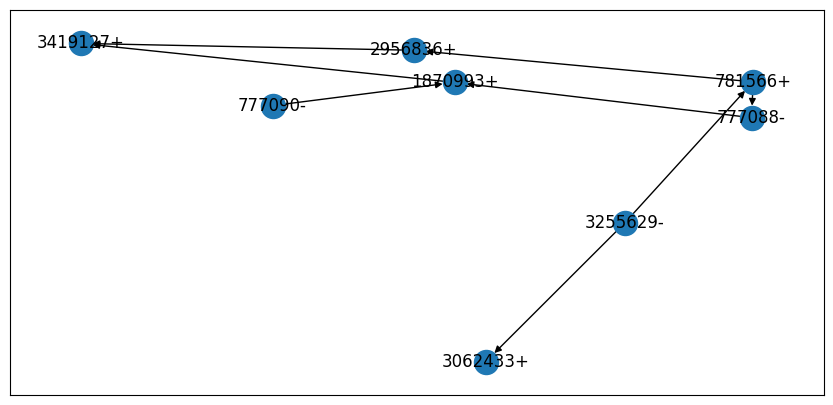

In [ ]:
c_elegans_graph_components = pyfastg_oop_c_elegans_graph.component_graphs()

for i in range(66):
    c_elegans_graph_component  = next(c_elegans_graph_components)

fig, axes = pyplot.subplots(figsize=(10.5,5))

display(c_elegans_graph_component.assembly_data)
draw_networkx(c_elegans_graph_component)

## 3 Speed comparison

Regular pyfastg is not inconviniently slow. However, I noticed that pyfast-oop loads assemmbly graphs slightly faster (usually 10-20%).<br>

Whenever possible I use list comprehension instead of regular for loops.<br>
(Explanation: https://www.youtube.com/watch?v=U88M8YbAzQk)

Test loading .\elegans_testdata\spades_assembly_graph.fastg
Iteration 1/10 completed
Iteration 2/10 completed
Iteration 3/10 completed
Iteration 4/10 completed
Iteration 5/10 completed
Iteration 6/10 completed
Iteration 7/10 completed
Iteration 8/10 completed
Iteration 9/10 completed
Iteration 10/10 completed
Test loading .\mouse_testdata\spades_assembly_graph.fastg
Iteration 1/10 completed
Iteration 2/10 completed
Iteration 3/10 completed
Iteration 4/10 completed
Iteration 5/10 completed
Iteration 6/10 completed
Iteration 7/10 completed
Iteration 8/10 completed
Iteration 9/10 completed
Iteration 10/10 completed


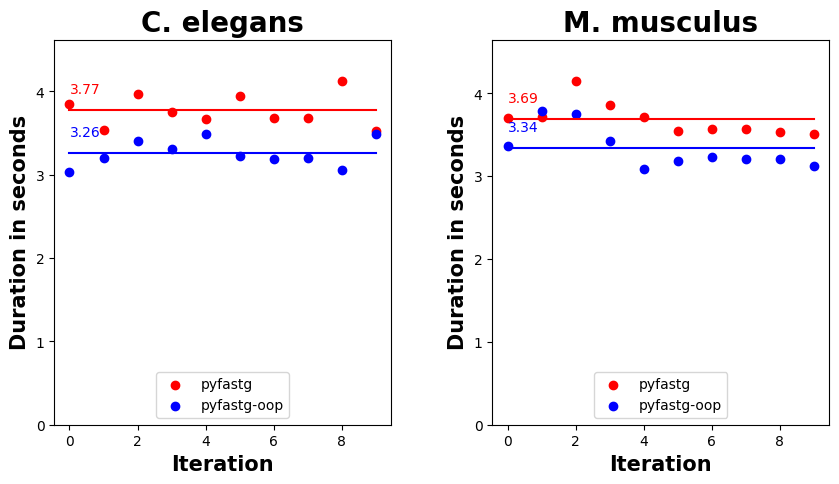

In [ ]:
fig, axes = pyplot.subplots(1,2, figsize=(10,5))
pyplot.subplots_adjust(wspace=0.3)

def plot_durations(durations, ax, color, label):
    x = [i for i in range(len(durations))]
    average_duration = average(durations)
    ax.scatter(x, durations, label=label, color=color)
    ax.plot([0,len(durations)-1], [average_duration,average_duration] , color=color)
    ax.text(0, average_duration+0.2, str(round(average_duration,2)), color=color)

axes[0].set_title("C. elegans", fontweight="bold", fontsize=20)
axes[1].set_title("M. musculus", fontweight="bold", fontsize=20)

for ax in axes:
    ax.set_xlabel('Iteration', fontweight="bold", fontsize=15)
    ax.set_ylabel('Duration in seconds', fontweight="bold", fontsize=15)

test_iterations = 10

for i, file in enumerate([c_elegans_fastg, m_musculus_fastg]):

    durations_pyfastg    = []
    durations_pyfastg_oop = []

    print(f'Test loading {file}')

    for j in range(test_iterations):
        # test pyfastg
        start = time()
        pyfastg.parse_fastg(c_elegans_fastg)
        end   = time()
        durations_pyfastg.append(end-start)
        # test pyfastg-oop
        start = time()
        reader = Fastg_reader()
        Assembly_graph(reader.parse_fastg(c_elegans_fastg))
        end   = time()
        durations_pyfastg_oop.append(end-start)

        print(f'Iteration {j+1}/{test_iterations} completed')

    plot_durations(durations_pyfastg, axes[i], "red", "pyfastg")
    plot_durations(durations_pyfastg_oop, axes[i], "blue", "pyfastg-oop")
    axes[i].set_ylim(ymin=0, ymax=array(durations_pyfastg+durations_pyfastg).max()+0.5)
    axes[i].legend(loc='lower center')